# Football Data Analysis
Football is a global, popular, and dynamic sport with many different factors that can influence the outcome of a match. By analyzing large datasets of football data, teams can gain a deeper understanding of factors that contribute to players' success, enabling coaches, scouts, and analysts to make informed decisions.

Football data analysis is the process of collecting, cleaning, and analyzing data to extract meaningful insights. The valuable insights extracted from this analysis can be used to improve player performance, team tactics, fan engagement, and overall decision-making.

# Sprint 3
- Performance Analysis: Performing descriptive analysis using various data analysis and visualization techniques, calculating probabilities, finding solutions to business questions related to data sampling, central limit theorem and normal distribution.
- Writing interpretation for each analysis individually.

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('football_data.csv')
data.head()

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman


--------------------------------------------------------------------------------------------------------------------------------------------------------
# 1. Descriptive Analysis
## What are the key summary statistics of goals scored per match?
(mean, median, standard deviation)

In [3]:
# Calculate descriptive statistics for goals scored
stats = data[['home_club_goals', 'away_club_goals']].describe()
total_goals = data['home_club_goals'] + data['away_club_goals']
combined_stats = total_goals.describe()

In [5]:
print("Descriptive Statistics:")
print(combined_stats)

Descriptive Statistics:
count    4654.000000
mean        2.784486
std         1.698461
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        17.000000
dtype: float64


### Interpretation:
- The mean, median, and standard deviation highlight scoring trends across matches.
- For example, a high mean indicates frequent scoring, while high variability might suggest unpredictable matches.

## What is the average playing time (in minutes) for players in the dataset?

In [18]:
# Calculate average playing time
average_playing_time = data['minutes_played'].mean()
print(f"Average playing time for players: {average_playing_time:.2f} minutes")

Average playing time for players: 74.57 minutes


### Intrpretation:
- This metric helps identify how much time players spend on the field on average.
- Teams can use this to understand player workloads and strategize rotations.

--------------------------------------------------------------------------------------------------------------------------------------------------------
# 2. Conditional Probability
## What is the probability that a player played more than 70 minutes in a game, given that they scored at least one goal?

In [14]:
players_with_goals = data[data['goals'] > 0]   # Filter players who scored at least one goal
p_goals = len(players_with_goals) / len(data)  # Calculate P(Goals > 0)

# Filter players who scored at least one goal and played more than 70 minutes
players_goals_and_minutes = players_with_goals[players_with_goals['minutes_played'] > 70]

# Calculate P(Minutes Played > 70 and Goals > 0)
p_minutes_and_goals = len(players_goals_and_minutes) / len(data)

In [ ]:
players_with_goals = data[data['goals'] > 0] 
p_goals = len(player_w_goals) / len(data) 
player_goals = player_w_goals[player_w_goals['minutes_played'] > 70]

p_minutes_and_goals = len(players_goals) / len(data)

In [15]:
# Calculate Conditional Probability: P(Minutes Played > 70 | Goals > 0)
if p_goals > 0:
    p_minutes_given_goals = p_minutes_and_goals / p_goals
else:
    p_minutes_given_goals = 0

print(f"Probability that a player played more than 70 minutes scored at least one goal: {p_minutes_given_goals:.2f}")

Probability that a player played more than 70 minutes scored at least one goal: 0.76


### Interpretation
- This probability indicates how often players who score at least one goal play more than 70 minutes.
- A high value suggests key performers are given extended playtime, while a low value highlights impactful contributions from players with fewer minutes.

## What is the probability of a player receiving a yellow card in a match?

In [20]:
# Probability of receiving a yellow card
prob_yellow_card = (data['yellow_cards'] > 0).mean()
print(f"Probability of receiving a yellow card: {prob_yellow_card:.2f}")

Probability of receiving a yellow card: 0.10


### Interpretation:
- This provides insights into discipline and gameplay intensity. Teams with high probabilities might need to improve discipline to avoid suspensions.

--------------------------------------------------------------------------------------------------------------------------------------------------------
# 3. Data Sampling
## How representative is a sample of 30 matches compared to the entire season's data?

In [4]:
import numpy as np

# Random sampling of 30 matches
sample = total_goals.sample(30, random_state=42)

# Compare mean and variance
population_mean = total_goals.mean()
sample_mean = sample.mean()
population_variance = total_goals.var()
sample_variance = sample.var()

In [5]:
print(f"Population Mean: {population_mean:.2f}")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Population Variance: {population_variance:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")

Population Mean: 2.78
Sample Mean: 2.97
Population Variance: 2.88
Sample Variance: 3.96


### Interpretation:
- If the sample mean and variance closely match the population, the sample is representative of overall trends.

## How does the sample median of goals scored compare to the population median?

In [6]:
# Random sampling of 30 matches
sample_30 = total_goals.sample(30, random_state=42)
population_median = total_goals.median()
sample_median = sample_30.median()

print(f"Population Median: {population_median}, Sample Median: {sample_median}")

Population Median: 2.0, Sample Median: 3.0


### Interpretation:
- If the sample median closely matches the population median, it indicates that the sample provides a good representation of central tendencies.

--------------------------------------------------------------------------------------------------------------------------------------------------------
# 4. Central Limit Theorem (CLT)
## How does the distribution of the sample mean of goals scored look when sampling multiple subsets of 30 matches?

In [7]:
import matplotlib.pyplot as plt

# Generate sample means
sample_means = [total_goals.sample(30, random_state=i).mean() for i in range(1000)]

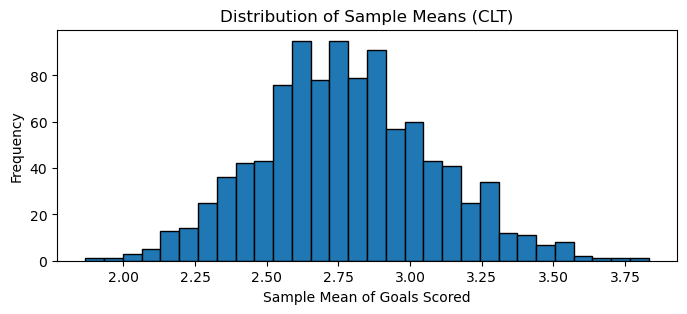

In [14]:
plt.figure(figsize=(8,3))
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title("Distribution of Sample Means (CLT)")
plt.xlabel("Sample Mean of Goals Scored")
plt.ylabel("Frequency")
plt.show()

### Interpretation:
- The plot demonstrates the CLT by showing that the sample means form a normal distribution, even if the original data is not normally distributed.

## What is the standard deviation of sample means for goals scored (CLT demonstration)?

In [22]:
sample_means_std = np.std([total_goals.sample(30, random_state=i).mean() for i in range(1000)])
print(f"Standard deviation of sample means: {sample_means_std:.2f}")

Standard deviation of sample means: 0.31


### Interpretation:
- This demonstrates the variability of sample means. A lower standard deviation indicates that the sample means are close to the population mean, validating the CLT.

--------------------------------------------------------------------------------------------------------------------------------------------------------
# 5. Normal Distribution
## Are the goals scored per match normally distributed?

In [16]:
from scipy.stats import shapiro

stat, p_value = shapiro(total_goals) # Perform normality test

if p_value > 0.05:
    print("Goals scored follow a normal distribution (fail to reject null hypothesis).")
else:
    print("Goals scored do not follow a normal distribution (reject null hypothesis).")

Goals scored do not follow a normal distribution (reject null hypothesis).


### Interpretation:
- The data is not normally distributed, advanced models may be required to analyze scoring trends.

## How does the distribution of goals scored compare to a normal distribution visually?

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

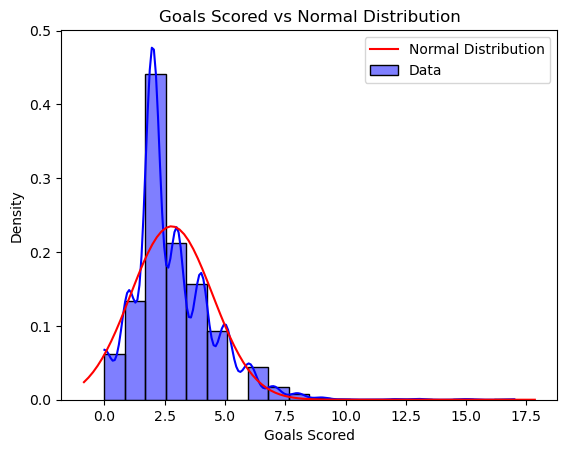

In [31]:
sns.histplot(total_goals, kde=True, stat="density", bins=20, color='blue', label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_goals.mean(), total_goals.std())
plt.plot(x, p, 'r', label='Normal Distribution')
plt.legend()
plt.title("Goals Scored vs Normal Distribution")
plt.xlabel("Goals Scored")
plt.ylabel("Density")
plt.show()

### Interpretation:
- A visual comparison highlights deviations from normality. Significant differences indicate that the data is not perfectly normal, which might require advanced methods for statistical analysis.